In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from donchian_ma import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 238.34 %
MDD: 32.75 %
MDD Duration 122 days 20:00:00
worst trade: -10.73 %
2022-09-06 08:00:00 ~ 2022-09-06 16:00:00
avg holding days: 8.62 days
--------------------------------------------
PF: 7.66
Sharpe Ratio: 2.04
Calmar Ratio: 6.11
Sortino Ratio: 3.62
Omega Ratio: 1.25
--------------------------------------------
Expectancy : 13.68 %
Total Time Exposure : 41.13 %
Total Trades: 22
Win Rate: 50.00 %
--------------------------------------------
PF * Win Rate: 3.831


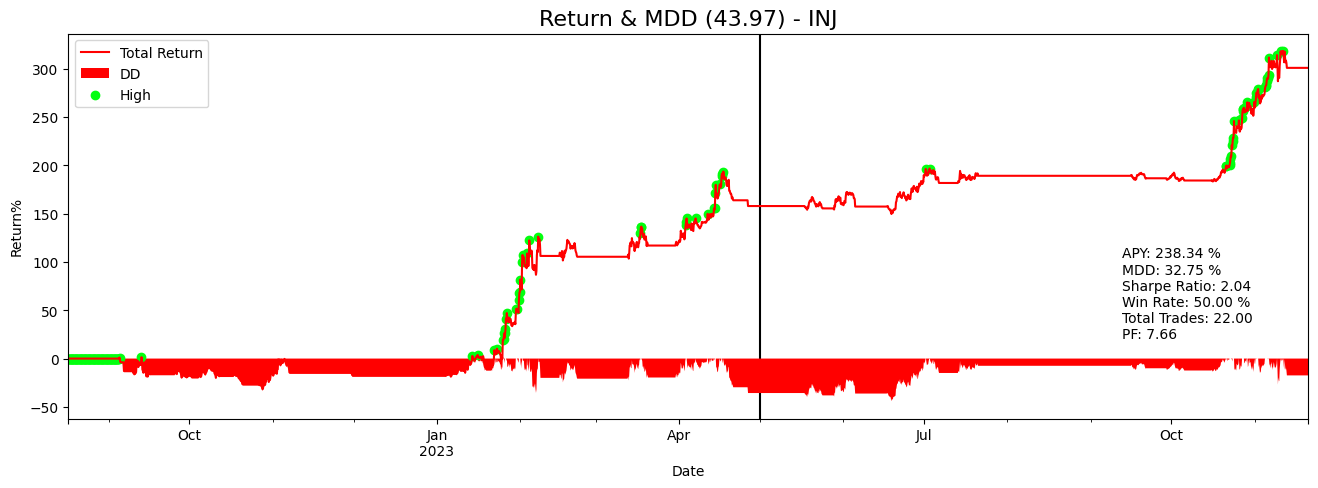

(None,
 Start                                2022-08-17 00:00:00
 End                                  2023-11-21 00:00:00
 Period                                 461 days 04:00:00
 Start Value                                      10000.0
 Min Value                                    6823.999235
 Max Value                                   41846.957775
 End Value                                   40102.885248
 Total Return [%]                              301.028852
 Benchmark Return [%]                          644.449649
 Total Time Exposure [%]                        41.127575
 Max Gross Exposure [%]                             100.0
 Max Drawdown [%]                               32.746181
 Max Drawdown Duration                  122 days 20:00:00
 Total Orders                                          44
 Total Fees Paid                               132.861925
 Total Trades                                          22
 Win Rate [%]                                        50.0
 Best T

In [76]:
start = '2022-01-01'
sep = ''
end = ''

params =  {'uchannel': 25, 'lchannel': 25, 'ma_window': 40}
                
side = 'long'
config = {'freq':'4h', 'lag':1, 'fee': 0.0003, 'weekend_filter':False}
coin = 'INJ'

# 5m: RUNE{'uchannel': 205, 'lchannel': 155, 'ma_window': 95}long,
# 5m: RUNE{'uchannel': 265, 'lchannel': 50, 'ma_window': 125}short,
# 15m: RUNE{'uchannel': 100, 'lchannel': 70, 'ma_window': 55}long,
# 15m: RUNE{'uchannel': 25, 'lchannel': 25, 'ma_window': 40}both,
# 15m: INJ{"uchannel": 175,"lchannel": 130,"ma_window": 145}long,
# 1h: INJ{'uchannel': 10, 'lchannel': 100, 'ma_window': 85}long,
# 4h: INJ{'uchannel': 25, 'lchannel': 25, 'ma_window': 40}long

df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [74]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['INJ']
sample_sets = [[start,end]]
freq = '4h'

params = {"uchannel":[99,100,8],
          "lchannel":[5,200,5],
          "ma_window":[5,200,5]}

config = {'freq':freq,'fee': 0.0003,'weekend_filter': False}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    df_dict=df_dict,
    end=end,
    )

all_params = multi_test.multi_params(['FET'],sample_sets,direction='short')
trades, value_df = multi_test.multi_params_result(all_params)


======================= FET SHORT Optimize Test =======================
Optimization trails: 1521































































































































































































100%|██████████| 1521/1521 [00:29<00:00, 50.94it/s]


Optimization time: 30.13 sec
---------- FET SHORT ----------
{'uchannel': 99, 'lchannel': 25, 'ma_window': 165}
+------------+-----------+---------+--------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |   毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+--------+------------+---------+------------|
| 2023-03    |     10.05 | 1005.01 |      0 |        inf |     100 |          2 |
| 2023-06    |     12.19 | 1219.22 |      0 |        inf |     100 |          1 |
+------------+-----------+---------+--------+------------+---------+------------+
